In [1]:
# show matplotlin inline without anomation
%matplotlib inline

import sys
sys.path.append("../")

import yaml
import matplotlib.pyplot as plt
import cattrs
import numpy as np
from typing import List
#from mixture_optimization.datamodels.trial_tracking_config import Experiment, ValResult, Dict
from mixture_optimization.datamodels.trial_tracking_config import Experiment, ValResult, Dict
from collections import defaultdict

from law import read_experiments, parse_results, fit, optimize

In [4]:
p1 = "../logs/bayesian_books_cc_stack_pes2o_reddit_16init_0/experiment_history.yaml"
p2 = "../logs/bayesian_books_cc_stack_pes2o_reddit_16init_1/experiment_history.yaml"

experiment1 = read_experiments(p1)[0]
experiment2 = read_experiments(p2)[0]

no_trials = 32
experiment1.trials = experiment1.trials[:no_trials]
experiment2.trials = experiment2.trials[:no_trials]

In [5]:
def get_values(experiment: Experiment):
    values = [trial.weighted_val_perplexity for trial in experiment.trials]
    return values

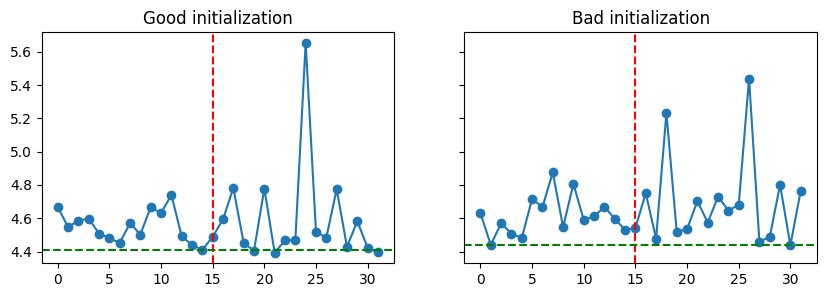

In [19]:
v1 = get_values(experiment1)
v2 = get_values(experiment2)

no_init = 16
v1_best_ini = min(v1[:no_init])
v2_best_ini = min(v2[:no_init])

# side by side plot with shared y axis
fig, ax = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
ax[0].plot(v1 , '-o')
# v line at 16
ax[0].axvline(x=no_init -1 , color='r', linestyle='--')
ax[0].axhline(y=v1_best_ini, color='g', linestyle='--')
ax[0].title.set_text('Good initialization')
ax[0].set_xlabel('Trial iteration')

ax[1].plot(v2, '-o')
# v line at 16
ax[1].axvline(x=no_init - 1, color='r', linestyle='--')
ax[1].axhline(y=v2_best_ini, color='g', linestyle='--')
ax[1].title.set_text('Bad initialization')
ax[1].set_xlabel('Trial iteration')

plt.show()
